<a href="https://colab.research.google.com/github/Shyamu431/Project-Aerofit/blob/main/Aerofit_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aerofit - Descriptive Statistics & Probability Project

____
____

### Problem Statement :-
**To find the Characteristics of target audience for each type of treadmills so that Aerofit can provide better recommendations to the new customers**

___

In [ ]:
# Importing the required modules needed for this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset into aero_df DataFrame
aero_df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')

In [ ]:
aero_df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
# Checking shape of the dataframe
aero_df.shape

(180, 9)

In [ ]:
# Finding null values
aero_df.isnull().sum().sum()

0

In [ ]:
# To check presence of any duplicate values
np.any(aero_df.duplicated())

False

In [ ]:
# Filtering non-numerical columns from the dataframe
object_col = aero_df.select_dtypes(object).columns
object_col

Index(['Product', 'Gender', 'MaritalStatus'], dtype='object')

In [ ]:
# Get unique values and value counts of non-numerical columns
for col in object_col:
    print(f"Unique values of {col}:- {aero_df[col].unique()}\n\nValue_counts of {col}:-\n{aero_df[col].value_counts()}\n")


Unique values of Product:- ['KP281' 'KP481' 'KP781']

Value_counts of Product:-
KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

Unique values of Gender:- ['Male' 'Female']

Value_counts of Gender:-
Male      104
Female     76
Name: Gender, dtype: int64

Unique values of MaritalStatus:- ['Single' 'Partnered']

Value_counts of MaritalStatus:-
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64



In [ ]:
# Filtering the numerical columns
num_cols = aero_df.select_dtypes(np.number).columns
num_cols

Index(['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'], dtype='object')

In [ ]:
# Finding number unique values from the numerical columns
for col in num_cols:
    print(f"Number of unique values in {col} = {aero_df[col].nunique()}\n")

Number of unique values in Age = 32

Number of unique values in Education = 8

Number of unique values in Usage = 6

Number of unique values in Fitness = 5

Number of unique values in Income = 62

Number of unique values in Miles = 37



In [ ]:
# Basic info of the dataframe
aero_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
# Changing the data types of few columns to category which will save us some memory and reduce the execution time
cols = ['Product','Gender','MaritalStatus']
aero_df[cols] = aero_df[cols].astype('category')

We can see that Product, Gender and MaritalStatus columns in the following info has been changed into category type

In [ ]:
aero_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [ ]:
# Statistical summary of numerical columns
stat = aero_df.describe()
stat

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Detecting outliers
___

In [ ]:
# Renaming the index name '50%' as median
stat.index = ['count', 'mean', 'std', 'min', '25%', 'median', '75%', 'max']

In [ ]:
# Substracting mean from median to find the outliers.
# Greater the number deviates from 0, the more outliers present in the columns,
# which we can easily verify using the boxplot below
stat.loc['median'] - stat.loc['mean']

Age            -2.788889
Education       0.427778
Usage          -0.455556
Fitness        -0.311111
Income      -3123.077778
Miles          -9.194444
dtype: float64

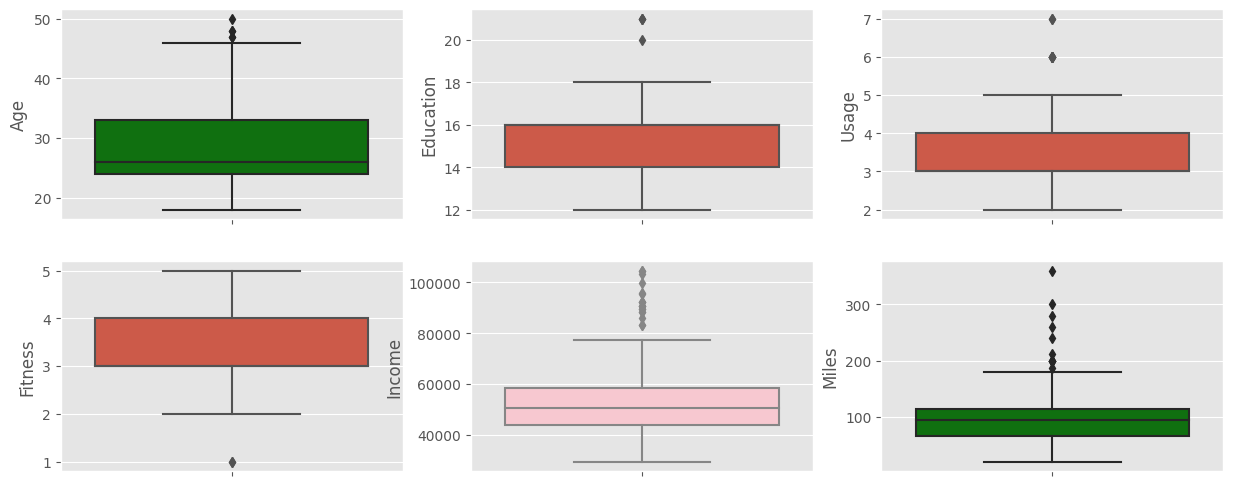

In [ ]:
# figuring out the outliers present in the numerical columns
with plt.style.context('ggplot'):
    fig = plt.figure(figsize=(15,6))

    plt.subplot(2,3,1)
    sns.boxplot(data=aero_df,y='Age',color = 'g')

    plt.subplot(2,3,2)
    sns.boxplot(data=aero_df,y='Education')

    plt.subplot(2,3,3)
    sns.boxplot(data=aero_df,y='Usage')

    plt.subplot(2,3,4)
    sns.boxplot(data=aero_df,y='Fitness')

    plt.subplot(2,3,5)
    sns.boxplot(data=aero_df,y='Income',color='pink')

    plt.subplot(2,3,6)
    sns.boxplot(data=aero_df,y='Miles',color='g')

______

In [ ]:
# Finding the outliers using IQR method
def outliers(col_name):

  values = np.array(col_name)
  # Calculating interquartile range to find the outliers in age columns
  quartile1, quartile3 = np.percentile(values,[25,75])
  iqr = quartile3 - quartile1

  # Finding upper and lower bounds
  upper_fence = quartile3 + 1.5*iqr
  lower_fence = quartile1 - 1.5*iqr

  # number of outliers above
  n_above = (values > upper_fence).sum()
  # number of outliers below
  n_below = (values < lower_fence).sum()
  total_outliers = n_above + n_below

  # create mask
  upper_mask = (values > upper_fence)
  lower_mask = (values < lower_fence)

  # finding the outliers
  upper_outliers = values[upper_mask]
  lower_outliers = values[lower_mask]

  print(f"Column Name: {i} \nTotal number of outliers: {total_outliers} \nUpper Outlers: {upper_outliers} \nLower Outliers: {lower_outliers}\n")
  return None

# selecting numeric values from the dataframe and calling the outliers function
df = aero_df.select_dtypes(include=[np.number])
for i in df.columns:
  outliers(aero_df[i])

Column Name: Age 
Total number of outliers: 5 
Upper Outlers: [47 50 48 47 48] 
Lower Outliers: []

Column Name: Education 
Total number of outliers: 4 
Upper Outlers: [20 21 21 21] 
Lower Outliers: []

Column Name: Usage 
Total number of outliers: 9 
Upper Outlers: [6 6 6 7 6 7 6 6 6] 
Lower Outliers: []

Column Name: Fitness 
Total number of outliers: 2 
Upper Outlers: [] 
Lower Outliers: [1 1]

Column Name: Income 
Total number of outliers: 19 
Upper Outlers: [ 83416  88396  90886  92131  88396  85906  90886 103336  99601  89641
  95866  92131  92131 104581  83416  89641  90886 104581  95508] 
Lower Outliers: []

Column Name: Miles 
Total number of outliers: 13 
Upper Outlers: [188 212 200 200 200 240 300 280 260 200 360 200 200] 
Lower Outliers: []



_____

In [ ]:
# Changing palette
sns.set_palette("deep")                 # tab10 can also be used to change the color palette
sns.set_palette(sns.color_palette())

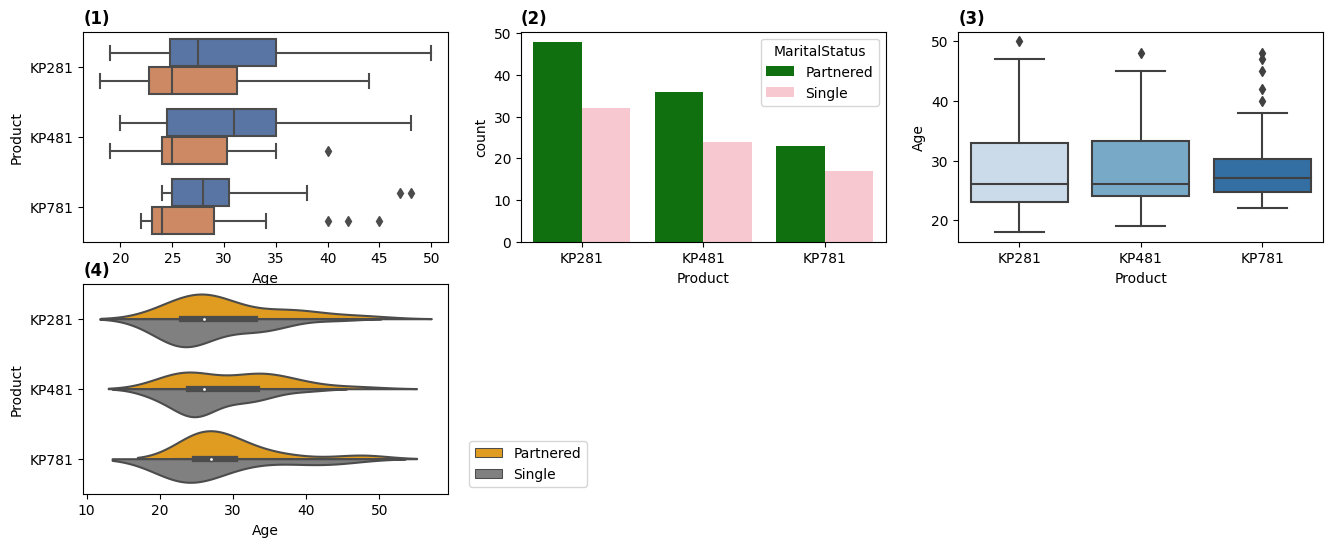

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(2,3,1)

# Boxplot for the relation between Age, MaritalStatus and Product Purchased
sns.boxplot(data=aero_df,hue='MaritalStatus',x='Age',y='Product')
plt.legend(bbox_to_anchor=(0, -0.5), loc='lower left')
plt.title('(1)',weight='bold',loc='left')

# countplot between Product purchased and Marital Status
plt.subplot(2,3,2)
ax = sns.countplot(data=aero_df,hue='MaritalStatus',x='Product',palette=['g','pink'])
plt.title('(2)',weight='bold',loc='left')

plt.subplot(2,3,3)
ax = sns.boxplot(data=aero_df,x='Product',y='Age',palette='Blues')
plt.title('(3)',weight='bold',loc='left')

# violinplot, showing the relation between Age, Marital status and product purchased
plt.subplot(2,3,4)
sns.violinplot(data=aero_df,x='Age',y='Product',hue='MaritalStatus',split=True, palette=['orange','grey'])
plt.legend(bbox_to_anchor=(1.4,0),loc='lower right')
plt.title('(4)',weight='bold',loc='left')

plt.show()


- [x] From plot no. 1(i.e. boxplot), we can easily infer that the median age of
  Person who are single and purchased any of the three product are in the range of 23 to 25 years.
- In case of Partnered, customer who purchased KP781 has median age of nearly 27 or 28, wheareas for KP481 it is nearly 31 and for KP281 it is around 26 or 27.


- [x]  Graph no.2 (i.e. countplot) shows that partnered customers have purchased more products in all the three categories compared to customers who are single.


- [x] Graph 3 indicates that the product KP781 have person with higher median age


- [x] Fig. 4(i.e. violinplot)  is just like boxplot, it shows that customer's who have more median age, purchased product KP781

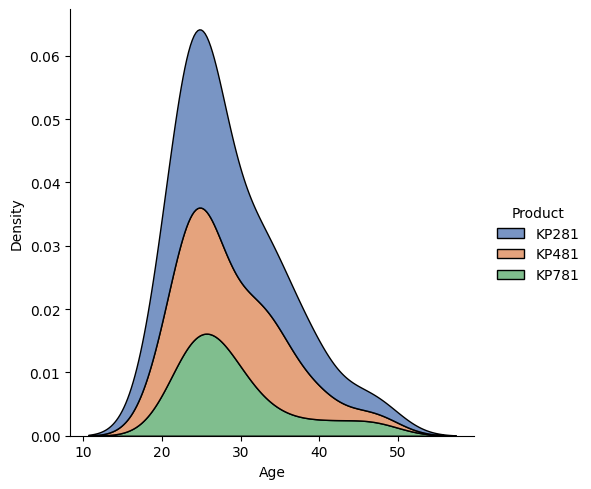

In [ ]:
# displot showing the distribution of different products with the age categories
sns.displot(data=aero_df,x='Age',hue='Product',kind='kde',multiple='stack')

plt.show()

Above graph shows that the age group of customers having age between 20 and 35 have purchased more number of treadmills


<Axes: xlabel='Education', ylabel='count'>

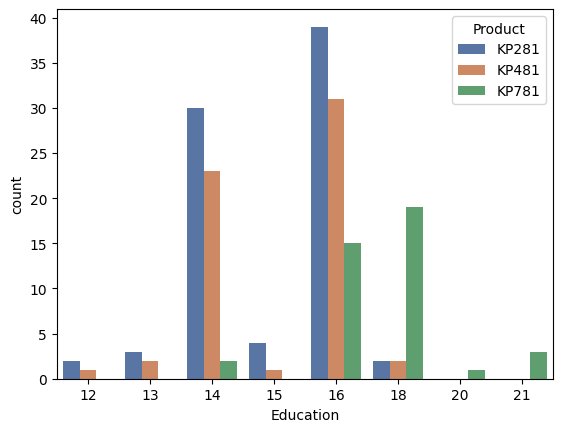

In [ ]:
# Relation between Education and Product purchased
sns.countplot(data=aero_df,x='Education',hue='Product')
plt.show()

Product KP781 is mostly used by customers who have education more than 16 years, whereas for KP481, education is between 14 and 16.

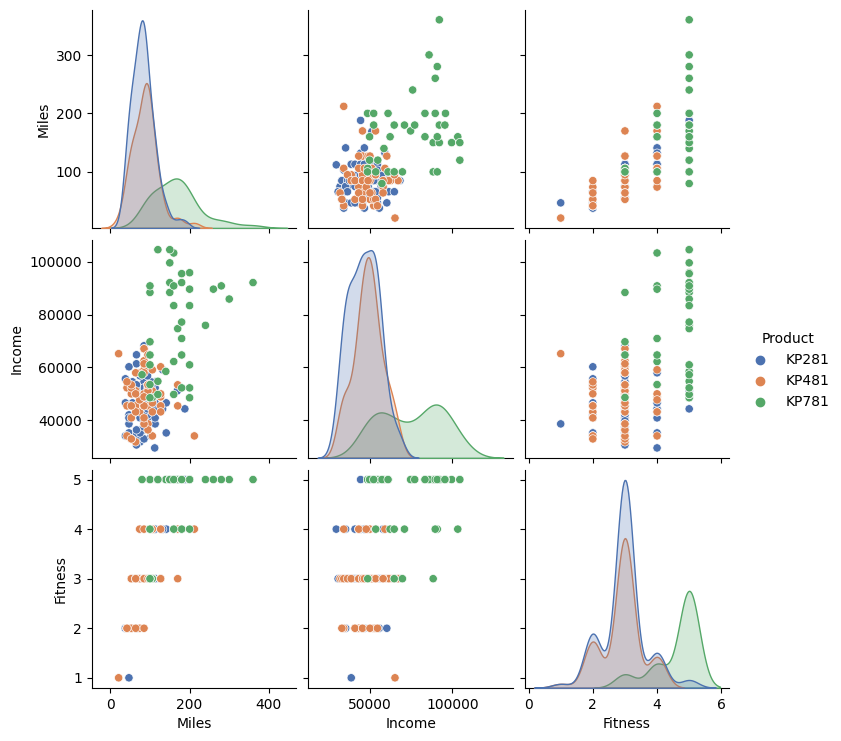

In [ ]:
# Extracting few columns from origianl dataframe and using pairplot on this newly created data frame

df1 = aero_df[['Miles','Income','Fitness','Product']]
sns.pairplot(data=df1,hue='Product')

There are many insights we can get from this plot, like

1 ) Customers who are more fit and have more number of miles run, they purchased product with high rating i.e. KP781, followed by KP481 and KP281

2) Customers with high level of fitness and having higher incomes, purchased KP781 product followed by KP481 and KP281

3) Customers who purchased product KP781, have higher incomes and they run more number of miles comparing to other type of customers.

____

## Marginal Probability


In [ ]:
# To find the marginal probabilty of the availabel products,
# we will divide the total number of each products divided by total numbers combining all the three product.

# Marginal probability for product KP281
marg_prob1 = round(len(aero_df[aero_df['Product'] == 'KP281'])/len(aero_df),3)

# Marginal probability of product KP481
marg_prob2 = round(len(aero_df[aero_df['Product'] == 'KP481'])/len(aero_df),3)

# Marginal probability of product KP781
marg_prob3 = round(len(aero_df[aero_df['Product'] == 'KP781'])/len(aero_df),3)
print(f"Marginal probability of KP281: {marg_prob1} \nMarginal probability of KP481: {marg_prob2} \nMarginal probability of KP781: {marg_prob3}")

Marginal probability of KP281: 0.444 
Marginal probability of KP481: 0.333 
Marginal probability of KP781: 0.222


In [ ]:
(cross_tab := pd.crosstab(aero_df["Product"],columns=aero_df["Gender"],margins=True))

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [ ]:
# Marginal probability can be also calculated using cross_tab function of pandas, here Gender is used as a column,
# on giving normalize the value as 'columns' it will divide all the values by total number of products which result in marginal probability

(cross_tab := pd.crosstab(aero_df["Product"],columns=aero_df["Gender"],margins=True,margins_name='Marginal Probability',normalize=True))

Gender,Female,Male,Marginal Probability
Product,,,
KP281,0.222222,0.222222,0.444444
KP481,0.161111,0.172222,0.333333
KP781,0.038889,0.183333,0.222222
Marginal Probability,0.422222,0.577778,1.000000


From this we can answer many questions like

* What is the probability of product user being a male ?
- [x] Ans: 0.577

* What is the probability of product user being a female ?
- [x] Ans: 0.422

*From this we can infer that men are more user of the overall products in comparison to women.*

In the given cross_tab, The values of Male and Female corresponding to each product is **joint probability** here.


<Axes: xlabel='Gender', ylabel='Product'>

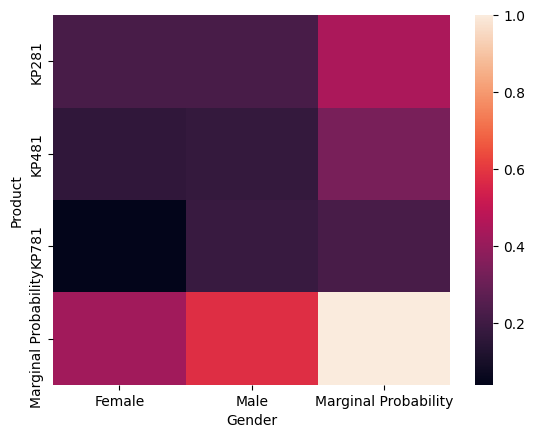

In [ ]:
# heatmap for showing probability relationship between Product and Gender
sns.heatmap(cross_tab)

____

## Conditional Probabilities


What is the probability of buying a KP781 treadmill by Male and Female ?

In [ ]:
# using the cross_tab dataframe, we can infer Male who use KP781 treadmil

male781 = cross_tab['Male'].loc['KP781']                    # filtering column Male and index KP781
marg781 = cross_tab['Marginal Probability'].loc['KP781']    # filtering column Marginal Probability and index KP781
m_KP781 = male781/marg781

male781 = cross_tab['Female'].loc['KP781']                  # filtering column Female and index KP781
marg781 = cross_tab['Marginal Probability'].loc['KP781']    # filtering column Marginal Probability and index KP781
f_KP781 = male781/marg781                               # dividing male781 with marginal probability(marg781) to get the conditional probability

print(f"Conditional probability of buying a KP781 treadmill by \nMale: {m_KP781} \nFemale: {f_KP781}")

Conditional probability of buying a KP781 treadmill by 
Male: 0.825 
Female: 0.17500000000000002


What is the probability of buying a KP481 treadmill by Male and Female ?

In [ ]:
# filtering columns and index KP481 to find the conditional probabili

male481 = cross_tab['Male'].loc['KP481']
marg481 = cross_tab['Marginal Probability'].loc['KP481']
m_KP481 = male481/marg481

male481 = cross_tab['Female'].loc['KP481']
marg481 = cross_tab['Marginal Probability'].loc['KP481']
f_KP481 = male481/marg481

print(f"Conditional probability of buying a KP481 treadmill by \nMale: {m_KP481} \nFemale: {f_KP481}")

Conditional probability of buying a KP481 treadmill by 
Male: 0.5166666666666667 
Female: 0.4833333333333334


What is the probability of buying a KP281 treadmill by Male and Female ?

In [ ]:
# filtering columns and index KP281 to find the conditional probability

male281 = cross_tab['Male'].loc['KP281']
marg281 = cross_tab['Marginal Probability'].loc['KP281']
m_KP281 = male281/marg281

male281 = cross_tab['Female'].loc['KP281']
marg281 = cross_tab['Marginal Probability'].loc['KP281']
f_KP281 = male281/marg281

print(f"Conditional probability of buying a KP281 treadmill by \nMale: {m_KP281} \nFemale: {f_KP281}")

Conditional probability of buying a KP281 treadmill by 
Male: 0.5 
Female: 0.5


# Business Insights


* Singles have purchased less number of treadmills comparatively
* Customers who are between 20 and 35, have purchase more number of treadmills
* Customers having higher income purchased more KP781 treadmills
* Customers having more miles run and have fitness purchased more KP781
* Sale of KP281 is more than KP481 which follows KP781
* Treadmills are used more by men than women
* KP781 treadmill is purchased more by men than women
* KP481 treadmill is purchased more by men than women although, difference is not so significant
* KP281 is purchased equally by both men and women


# Recommendations
- [x] Focus should be more on customers who are married.
- [x] Target customers who are of age between 20 and 35.
- [x] For KP781 treadmill, focus should be on customers who are earning more
- [x] For selling KP781, focus should also be on customers who are more educated
- [x] Focus should be both on men and women but priority should be more on men
